# 기본 EDA

주어진 데이터를 살펴보는 기본 EDA 과정을 진행합니다.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings('ignore')

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:91: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# 필요한 패키지와 라이브러리
#!git clone https://github.com/namepen/nanum_font.git

import matplotlib as mpl
import matplotlib.font_manager as font_manager

font_dirs = 'nanum_font' # 설치된 경로를 넣습니다.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs) # path에 있는 font_files를 인식

for font_file in font_files: # 폰트 추가
    font_manager.fontManager.addfont(font_file)
    
mpl.rcParams['font.family'] = 'NanumGothic' # 기본 폰트로 추가
mpl.rcParams['axes.unicode_minus'] = False # - 부호 깨짐방지

def simple_map(tiles=False):
    if tiles:
        maps = folium.Map(location=[37.273865, 127.01368], zoom_start=13) #, tiles = 'Cartodb Positron'
    else:
        maps = folium.Map(location=[37.273865, 127.01368], zoom_start=13, tiles = 'Cartodb Positron')
    return maps

d_path = './dataset/'

## 1. 버스정류장

* 정류장 ID와 정류장명으로 구분
* 정류장유형과 환승역타입이 나뉨
* 위치는 동명주소와 좌표가 주어짐(WGS84 좌표계(EPSG : 4326))
* 버스정류장의 특성이 나타나있음
    1. 쉘터여부
    2. 버스도착정보를 표시여부를 나타내는 BIS설치여부
    3. LED나 LCD, LED+LCD 복합형 여부
    4. 알뜰형과 임대형여부
    5. 알뜰형 : 알뜰형 전광판 설치 개수 / 임대형 : 임대형 전광판 설치 개수

In [3]:
df_1 = pd.read_csv('./dataset/1.수원시_버스정류장.csv')

In [4]:
df_1.head()

,정류장ID,정류장명,정류장유형,환승역타입,위치(동),쉘터,BIS설치여부,LED,LCD,LED+LCD복합형,알뜰형,임대형(음성),lon,lat
0,201000313,권선구청,"시내,마을",일반,경기도 수원시 서둔동,1.0,1.0,1.0,NaN,NaN,NaN,NaN,126.970983,37.256983
1,201000344,중보들공원,"시내,마을",일반,경기도 수원시 평동,1.0,NaN,NaN,NaN,NaN,NaN,NaN,126.991029,37.244605
2,201000345,남수원초등학교,시내,일반,경기도 수원시 세류2동,NaN,1.0,NaN,NaN,NaN,1.0,NaN,127.016000,37.251091
3,201000379,신미주아파트,시내,일반,경기도 수원시 금곡동,NaN,1.0,1.0,NaN,NaN,NaN,NaN,126.953845,37.268806
4,201000055,농수산물시장,시내,일반,경기도 수원시 권선1동,NaN,1.0,NaN,1.0,NaN,NaN,NaN,127.029815,37.256755


In [5]:
pd.DataFrame(df_1.isnull().sum()).T

,정류장ID,정류장명,정류장유형,환승역타입,위치(동),쉘터,BIS설치여부,LED,LCD,LED+LCD복합형,알뜰형,임대형(음성),lon,lat
0,0,0,0,11,0,398,251,801,1013,821,1153,1179,0,0


### 찾아볼만한 점

1. LED 및 LED+LCD 복합형은 다수가 설치된 정류장이 있음
2. 임대형은 모두 nan 값으로 보임
3. 쉘터와 LCD는 nan or 1

In [6]:
df_1.describe()

,정류장ID,쉘터,BIS설치여부,LED,LCD,LED+LCD복합형,알뜰형,임대형(음성),lon,lat
count,1.179000e+03,781.0,928.0,378.000000,166.0,358.000000,26.0,0.0,1179.000000,1179.000000
mean,2.017975e+08,1.0,1.0,1.013228,1.0,1.075419,1.0,NaN,127.013683,37.273866
std,3.128147e+06,0.0,0.0,0.114399,0.0,0.715893,0.0,NaN,0.036073,0.021349
min,2.000000e+08,1.0,1.0,1.000000,1.0,1.000000,1.0,NaN,126.938013,37.229338
25%,2.010000e+08,1.0,1.0,1.000000,1.0,1.000000,1.0,NaN,126.984351,37.257364
50%,2.010004e+08,1.0,1.0,1.000000,1.0,1.000000,1.0,NaN,127.015469,37.271664
75%,2.030001e+08,1.0,1.0,1.000000,1.0,1.000000,1.0,NaN,127.044461,37.291901
max,2.330020e+08,1.0,1.0,2.000000,1.0,10.000000,1.0,NaN,127.083181,37.334289


정류장 유형을 나타내는 정보로, 해당 정류장에 어떤 버스가 정차하는지 나타내는 것 같음

In [7]:
df_1['정류장유형'].unique()

array(['시내,마을', '시내', '시내,시외', '시내,마을,시외', '시내,공항', '시내,시외,공항',
       '시내,마을,공항'], dtype=object)

In [8]:
df_1.columns

Index(['정류장ID', '정류장명', '정류장유형', '환승역타입', '위치(동)', '쉘터', 'BIS설치여부', 'LED',
       'LCD', 'LED+LCD복합형', '알뜰형', '임대형(음성)', 'lon', 'lat'],
      dtype='object')

환승역타입은 버스정류장 정보시스템에 기록된 데이터입니다. 운영진의 답변 결과, `환승`으로 입력된 데이터는 잘못 입력된 데이터라고 합니다.
* 질문 링크 : [Link](https://compas.lh.or.kr/qnainfo?pageIndex=1&pageSize=10&searchKey=both&searchText=%EB%B2%84%EC%8A%A4%EC%A0%95%EB%A5%98%EC%9E%A5&totalCount=11&brdArtclNo=1109)

In [9]:
# nan값을 채워줌
df_1['환승역타입'].fillna('기타', inplace=True)
df_1.fillna(0, inplace=True)

In [10]:
# 환승역타입은 값이 없는 11개의 정류장과 하나의 환승 정류장, 나머지는 모두 일반 정류장임
#df_1['환승역타입'].unique() # 일반, nan, 환승
df_1['환승역타입'].fillna('기타').value_counts()

일반    1167
기타      11
환승       1
Name: 환승역타입, dtype: int64

In [11]:
df_1[df_1['환승역타입'] == '환승']

,정류장ID,정류장명,정류장유형,환승역타입,위치(동),쉘터,BIS설치여부,LED,LCD,LED+LCD복합형,알뜰형,임대형(음성),lon,lat
746,201000538,당수동,"시내,마을",환승,경기도 수원시 입북동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.944695,37.29388


In [12]:
tmp = df_1[df_1['환승역타입'] == '환승']

maps = simple_map()
folium.Marker(location=[tmp['lat'], tmp['lon']]).add_to(maps)

In [13]:
#maps

### 버스정류장 내 광고판

- 임대형(음성)은 모두 nan 값
- BIS가 설치된 정류장은 약 78%
- 광고판이 설치된 정류량은 약 78%
    -> BIS 설치된 정류장은 모두 광고판이 설치되어 있나?
- 쉘터의 설치율은 약 66%

In [14]:
tmp = df_1[['쉘터', 'BIS설치여부', 'LED','LCD', 'LED+LCD복합형', '알뜰형', '임대형(음성)']]
tmp['광고설치'] = tmp[['LED', 'LCD', 'LED+LCD복합형', '알뜰형']].sum(axis=1) >= 1
tmp = tmp >= 1
#tmp = pd.DataFrame(tmp[i].value_counts() for i in tmp.columns).fillna(0)
tmp_sum = pd.DataFrame(tmp[i].value_counts(normalize=True) for i in tmp.columns).fillna(0)
tmp_sum.rename(columns={True: '설치', False: '미설치'}, inplace=True)
tmp_sum

,설치,미설치
쉘터,0.662426,0.337574
BIS설치여부,0.787108,0.212892
LED,0.320611,0.679389
LCD,0.140797,0.859203
LED+LCD복합형,0.303647,0.696353
알뜰형,0.022053,0.977947
임대형(음성),0.000000,1.000000
광고설치,0.787108,0.212892


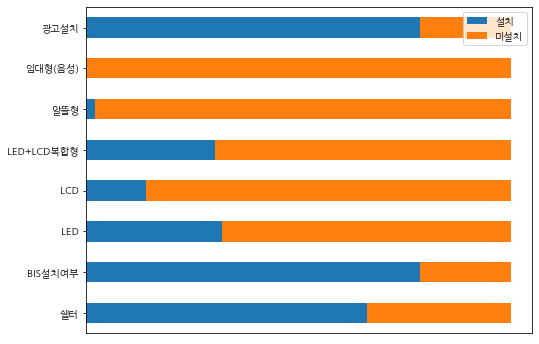

In [15]:
fig , ax = plt.subplots(figsize=(8,6))
tmp_sum.plot(kind='barh', stacked=True, ax=ax) # .loc[['광고설치', 'BIS설치여부', '쉘터']]
ax.set_xticks([])
plt.show()

BIS가 설치된 정류장은 모두 광고판이 있는가?

-> 모두 광고판이 있음

In [16]:
tmp.groupby(['BIS설치여부', '광고설치'])['쉘터'].count()

BIS설치여부  광고설치 
False    False    251
True     True     928
Name: 쉘터, dtype: int64

## 2. 유동인구

유동인구 데이터는 3가지가 제공됩니다.
1. 시간대별
2. 성&연령대별
3. 요일별

유동인구는 비공개 데이터이므로 내용 삭제

## 3. 수원시 지역 파악

* 4개의 구 단위로 이루어짐 : 장안구, 권선구, 팔달구, 영통구
* 각 구는 아래와같은 법정동 수를 보유
    - 수원시 권선구    16
    - 수원시 영통구     7
    - 수원시 장안구    11
    - 수원시 팔달구    22
* 최종 설치 대수는 30대이므로, 동의 숫자보다 작다. 동별로 가장 많은 이용객 수를 파악해서 설치를 고려

In [17]:
df_29 = gpd.read_file('./dataset/29.수원시_법정경계(시군구).geojson')
df_30 = gpd.read_file('./dataset/30.수원시_법정경계(읍면동).geojson')

In [18]:
df_29

,SIG_CD,SIG_KOR_NM,geometry
0,41111,수원시 장안구,"MULTIPOLYGON (((127.01976 37.35104, 127.02008 ..."
1,41113,수원시 권선구,"MULTIPOLYGON (((127.03723 37.23684, 127.03679 ..."
2,41115,수원시 팔달구,"MULTIPOLYGON (((127.03582 37.29361, 127.03644 ..."
3,41117,수원시 영통구,"MULTIPOLYGON (((127.07484 37.26588, 127.07488 ..."


<AxesSubplot:>

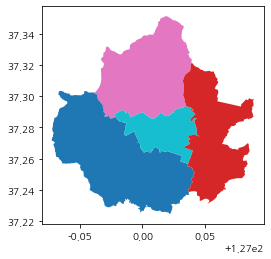

In [19]:
df_29.plot(column='SIG_KOR_NM')

In [20]:
df_30['multi'] = df_30['geometry']
df_30['geometry'] = df_30['geometry'].centroid
df_30 = gpd.sjoin(df_30, df_29, how='inner', op='within')
df_30 = df_30.drop(columns=['geometry', 'index_right']).rename(columns={'multi':'geometry'})

In [21]:
df_30.head()

,EMD_CD,EMD_KOR_NM,geometry,SIG_CD,SIG_KOR_NM
0,41111129,파장동,"MULTIPOLYGON (((127.01079 37.31908, 127.01047 ...",41111,수원시 장안구
1,41111130,정자동,"MULTIPOLYGON (((126.98697 37.31147, 126.98705 ...",41111,수원시 장안구
2,41111131,이목동,"MULTIPOLYGON (((126.98105 37.32685, 126.98160 ...",41111,수원시 장안구
3,41111132,율전동,"MULTIPOLYGON (((126.97444 37.30857, 126.97466 ...",41111,수원시 장안구
4,41111133,천천동,"MULTIPOLYGON (((126.98169 37.30624, 126.98170 ...",41111,수원시 장안구


In [22]:
df_30.groupby('SIG_KOR_NM')['EMD_KOR_NM'].count()

SIG_KOR_NM
수원시 권선구    16
수원시 영통구     7
수원시 장안구    11
수원시 팔달구    22
Name: EMD_KOR_NM, dtype: int64

<AxesSubplot:>

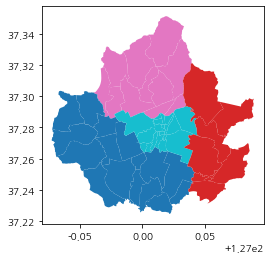

In [23]:
df_30.plot(column='SIG_KOR_NM')

## 4. 수원시_대기오염도_측정현황

* 수원시의 미세먼지 측정소에서 측정한 미세먼지 관련 수치가 나와있습니다.
* 미세먼지 센서는 총 8개소에 설치되어 있습니다.

In [24]:
df_11 = gpd.read_file('./dataset/11.수원시_대기오염도_측정현황.csv')

In [25]:
df_11.head()

,구분,측정월,측정소,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소(ppm),아황산가스(ppm),일산화탄소(ppm),비고,lon,lat,geometry
0,도시대기,2019.1월,고색동,62,41,0.010,0.042,0.005,0.8,,126.976384,37.252329,None
1,도시대기,2019.1월,광교동,64,36,0.008,0.053,0.004,0.8,,127.070615,37.291321,None
2,도시대기,2019.1월,신풍동,65,40,0.011,0.043,0.005,0.8,,127.010465,37.28385,None
3,도시대기,2019.1월,영통동,68,23,0.010,0.046,0.003,0.9,,127.056294,37.246901,None
4,도시대기,2019.1월,인계동,68,42,0.013,0.043,0.004,0.9,,127.028723,37.263637,None


In [26]:
df_11['geometry'] = gpd.points_from_xy(df_11['lon'], df_11['lat'])

<AxesSubplot:>

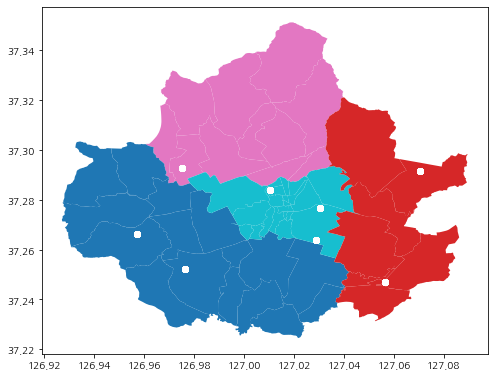

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
df_30.plot(column='SIG_KOR_NM', ax=ax)
df_11['geometry'].plot(color='white', ax=ax)

## 5. 지적도 

In [28]:
df_32 = gpd.read_file('./dataset/32.수원시_지적도.geojson')

In [29]:
print(len(df_32))
df_32.head()

128841


,PNU,JIBUN,geometry
0,4111710300101670003,167-3전,"MULTIPOLYGON (((127.05529 37.28866, 127.05533 ..."
1,4111113800101980001,198-1전,"MULTIPOLYGON (((127.01543 37.32614, 127.01547 ..."
2,4111710300201190028,산119-28임,"MULTIPOLYGON (((127.05120 37.28951, 127.05120 ..."
3,4111710300109070001,907-1잡,"MULTIPOLYGON (((127.03676 37.29320, 127.03723 ..."
4,4111710300101770017,177-17임,"MULTIPOLYGON (((127.05132 37.28945, 127.05170 ..."


<AxesSubplot:>

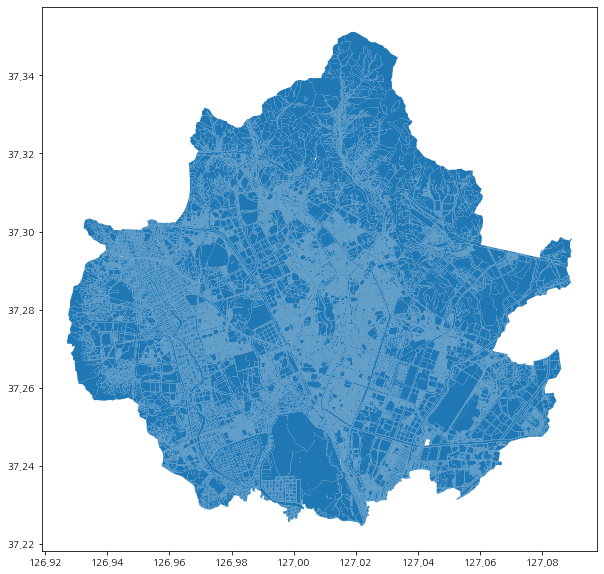

In [30]:
df_32.plot(figsize=(10, 10))

## 6. 광고판 개수 파악

기존 설치된 광고판의 위치를 파악하면, 어떤 지역에서 광고 설치 선호도가 높은지 알수있지 않을까?

In [31]:
df_10 = gpd.read_file('./dataset/10.수원시_옥외광고물현황.csv')
for c in ['가로', '세로', '도로저촉가로', '도로저촉세로', 'lon', 'lat']:
    df_10[c] = df_10[c].astype(float)

In [32]:
df_10['geometry'] = gpd.points_from_xy(df_10['lon'], df_10['lat'])

In [33]:
tmp = gpd.sjoin(df_10, df_30, how='left', op='within')

In [34]:
tmp['EMD_KOR_NM'].nunique(), df_30['EMD_KOR_NM'].nunique()

(42, 56)

In [35]:
df_10.head()

,광고물종류,가로,세로,높이,면,도로저촉여부,도로저촉가로,도로저촉세로,업종구분,lon,lat,geometry
0,가로형간판,0.4,0.3,0,0.12,N,0.0,0.0,기타,127.002798,37.308939,POINT (127.00280 37.30894)
1,가로형간판,3.5,0.7,0,2.45,N,0.0,0.0,이미용업,127.002798,37.308939,POINT (127.00280 37.30894)
2,돌출간판,0.2,0.7,2.3,0.14,N,0.0,0.0,이미용업,127.002798,37.308939,POINT (127.00280 37.30894)
3,지주이용 간판,0.8,2.8,3,2.24,N,0.0,0.0,일반음식점,127.004600,37.302031,POINT (127.00460 37.30203)
4,가로형간판,4.0,1.1,0,4.4,N,0.0,0.0,일반음식점,127.004600,37.302031,POINT (127.00460 37.30203)


In [36]:
df_10['광고물종류'].unique()

array(['가로형간판', '돌출간판', '지주이용 간판', '가로형간판_입체형', '세로형간판', '옥상간판',
       '창문이용광고물', '벽면이용현수막', '현수막게시틀', '공공시설물이용 광고물', '입간판', '지정게시대이용현수막',
       '지주이용현수막', '벽보', '선전탑', '아취공고물', '교통시설이용 광고물', '전단', '기타', '애드벌룬',
       '가로등 현수기', ''], dtype=object)

In [37]:
df_10['도로저촉여부'].value_counts()

N    94868
Y     2192
        95
Name: 도로저촉여부, dtype: int64

In [38]:
df_10.groupby('광고물종류')[['가로', '세로']].describe()

가로                                                           \
               count      mean       std   min     25%    50%     75%     max   
광고물종류                                                                           
                13.0  0.000000  0.000000  0.00  0.0000  0.000  0.0000    0.00   
가로등 현수기          2.0  0.665000  0.289914  0.46  0.5625  0.665  0.7675    0.87   
가로형간판        38451.0  4.506331  3.314555  0.00  2.7000  3.700  5.7000  127.40   
가로형간판_입체형    13392.0  5.301308  7.854445  0.00  3.2000  4.500  6.6400  828.00   
공공시설물이용 광고물     35.0  2.194571  2.674340  0.21  0.4450  0.970  2.7500   12.41   
교통시설이용 광고물       5.0  1.992000  1.497555  0.30  1.0600  1.580  3.0300    3.99   
기타              23.0  2.305217  1.965752  0.06  0.6000  1.600  3.2000    6.37   
돌출간판         24306.0  0.708751  2.299575  0.00  0.6000  0.700  0.8000  340.98   
벽면이용현수막        261.0  4.521724  3.330759  0.13  2.2300  3.570  6.1900   21.88   
벽보             167.0  1.849042  1.945772  0.25  0.5700  1.100  2.3650   11.34   
선전탑             99.0  1.528788  1.683147  0.18  0.4350  0.990  1.9050   11.96   
세로형간판        12204.0  0.583369  0.565834  0.00  0.3000  0.400  0.7000   15.00   
아취공고물            3.0  2.896667  1.764209  0.93  2.1750  3.420  3.8800    4.34   
애드벌룬             1.0  1.210000       NaN  1.21  1.2100  1.210  1.2100    1.21   
옥상간판          1345.0  3.269346  3.395635  0.00  0.7000  2.500  4.5000   32.77   
입간판             46.0  0.699348  0.723167  0.22  0.4500  0.520  0.6700    5.00   
전단               2.0  3.335000  3.570889  0.81  2.0725  3.335  4.5975    5.86   
지정게시대이용현수막       8.0  2.083750  2.824732  0.38  0.4850  0.940  1.9175    8.60   
지주이용 간판       3813.0  1.476598  3.998733  0.08  0.7000  0.800  1.4200  227.85   
지주이용현수막        160.0  1.983125  3.460399  0.16  0.5675  0.700  2.0000   35.37   
창문이용광고물       2636.0  3.255979  3.671750  0.10  1.2000  2.200  3.8625   95.00   
현수막게시틀         183.0  3.498306  2.702122  0.40  1.7100  2.850  4.4500   15.00   

                  세로                                                           
               count      mean       std   min     25%    50%     75%     max  
광고물종류                                                                          
                13.0  0.000000  0.000000  0.00  0.0000  0.000  0.0000    0.00  
가로등 현수기          2.0  3.315000  2.043539  1.87  2.5925  3.315  4.0375    4.76  
가로형간판        38451.0  1.084926  1.325843  0.00  0.7700  1.000  1.3000  198.00  
가로형간판_입체형    13392.0  0.938496  1.018068  0.00  0.6000  0.795  1.1000   60.00  
공공시설물이용 광고물     35.0  1.261714  0.985454  0.25  0.5550  1.030  1.7350    4.36  
교통시설이용 광고물       5.0  2.786000  2.568683  1.05  1.5200  1.750  2.3000    7.31  
기타              23.0  1.155217  0.710377  0.23  0.4050  1.100  1.8000    2.30  
돌출간판         24306.0  1.855491  1.901319  0.00  0.7000  1.600  2.5000  192.00  
벽면이용현수막        261.0  2.887625  2.977372  0.00  1.0000  1.720  3.2900   17.05  
벽보             167.0  1.446168  1.377011  0.24  0.7800  1.260  1.8050   16.34  
선전탑             99.0  1.638485  2.105486  0.15  0.4950  0.950  1.6800   13.30  
세로형간판        12204.0  2.308183  1.381299  0.00  1.8300  2.200  2.5000   34.00  
아취공고물            3.0  1.173333  0.434319  0.80  0.9350  1.070  1.3600    1.65  
애드벌룬             1.0  2.880000       NaN  2.88  2.8800  2.880  2.8800    2.88  
옥상간판          1345.0  1.653643  1.311291  0.00  0.9700  1.220  2.0000   12.00  
입간판             46.0  1.279348  0.688407  0.19  0.9000  1.080  1.4425    3.75  
전단               2.0  1.215000  0.926310  0.56  0.8875  1.215  1.5425    1.87  
지정게시대이용현수막       8.0  1.575000  0.621910  0.46  1.3850  1.460  1.8775    2.47  
지주이용 간판       3813.0  2.204249  1.757430  0.00  1.0000  1.700  3.0000   18.09  
지주이용현수막        160.0  2.139375  2.399424  0.16  1.1675  1.755  2.0625   20.66  
창문이용광고물       2636.0  1.374924  1.112860  0.10  0.6000  1.220  1.8425   20.00  
현수막게시틀         183.0  3.163333  3.123189  0.12  0.8300  2.100  4.2100   

특정 지역(중간 흰색부분)에 광고판 데이터가 없습니다.

<AxesSubplot:>

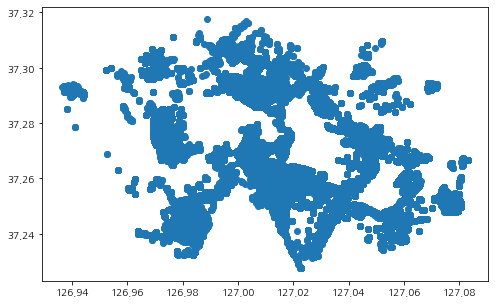

In [39]:
'''# 바탕 맵 생성하기
my_map = simple_map()

# circle 포인트 생성하기
for lon, lat in zip(df_10['lon'], df_10['lat']):
    folium.Circle(location= [lat, lon],          
                  radius=1).add_to(my_map)
my_map'''
df_10.plot(figsize=(8,8))

## 7. 인구격자

### 1. 고령인구

In [40]:
df_17 = gpd.read_file('./dataset/17.수원시_인구정보(고령)_격자.geojson')

In [41]:
df_17.isnull().sum()

gid            0
val         8001
geometry       0
dtype: int64

In [42]:
print(len(df_17))
df_17.head()

12500


,gid,val,geometry
0,다사491193,NaN,"MULTIPOLYGON (((126.92589 37.27122, 126.92589 ..."
1,다사492193,NaN,"MULTIPOLYGON (((126.92702 37.27123, 126.92701 ..."
2,다사492194,NaN,"MULTIPOLYGON (((126.92701 37.27213, 126.92701 ..."
3,다사492195,NaN,"MULTIPOLYGON (((126.92701 37.27303, 126.92700 ..."
4,다사492196,NaN,"MULTIPOLYGON (((126.92700 37.27393, 126.92699 ..."


In [43]:
df_17['val'].fillna(0, inplace=True)

<AxesSubplot:>

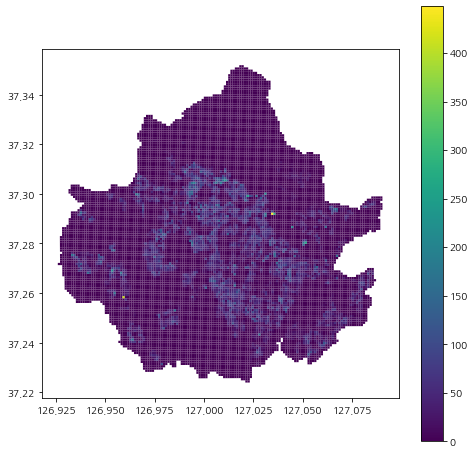

In [44]:
df_17.plot(column='val', figsize=(8,8), legend=True)

### 2. 생산가능 인구

In [45]:
df_18 = gpd.read_file('./dataset/18.수원시_인구정보(생산가능)_격자.geojson')

In [46]:
df_18.isnull().sum(), len(df_18)

(gid            0
 val         7629
 geometry       0
 dtype: int64,
 12500)

In [47]:
df_18['val'].fillna(0, inplace=True)

<AxesSubplot:>

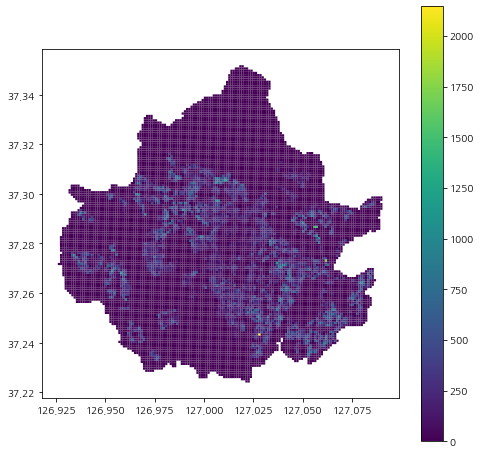

In [48]:
df_18.plot(column='val', figsize=(8,8), legend=True)

### 3. 유소년 인구

In [49]:
df_19 = gpd.read_file('./dataset/19.수원시_인구정보(유소년)_격자.geojson')

In [50]:
df_19.isnull().sum(), len(df_19)

(gid            0
 val         8652
 geometry       0
 dtype: int64,
 12500)

In [51]:
df_19['val'].fillna(0, inplace=True)

<AxesSubplot:>

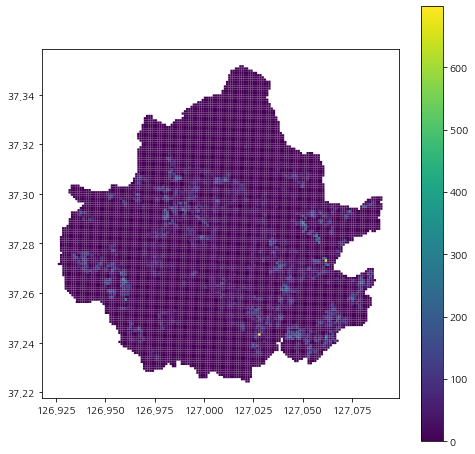

In [52]:
df_19.plot(column='val', figsize=(8,8), legend=True)

<AxesSubplot:>

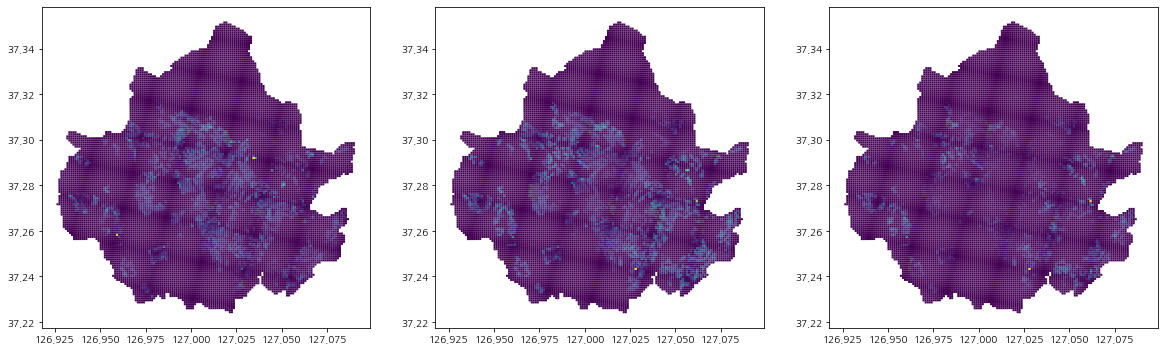

In [53]:
fig, ax = plt.subplots(1,3, figsize=(20, 7))
df_17.plot(column='val', ax=ax[0], legend=False)
df_18.plot(column='val', ax=ax[1], legend=False)
df_19.plot(column='val', ax=ax[2], legend=False)

인구격자에 해당 법정동명을 부여합니다.

## 8. 인도 & 교통링크

상세교통량 관련 데이터는 비공개로 내용 삭제

In [54]:
df_26 = gpd.read_file('./dataset/26.수원시_인도(2017).geojson')

In [55]:
df_26.head()

,UFID,WIDT,QUAL,BYYN,KIND,geometry
0,1000037612070A00310000000000154767,0.0,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.98492 37.32861, 126.9849..."
1,1000037612070A00310000000000154768,0.0,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.98567 37.32644, 126.9857..."
2,1000037612070A00310000000000154769,0.0,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.98459 37.32839, 126.9849..."
3,1000037612070A00310000000000154793,3.0,SWQ003,BYC001,SWK001,"MULTILINESTRING ((126.98565 37.32643, 126.9856..."
4,1000037612070A00310000000000154794,3.0,SWQ003,BYC001,SWK001,"MULTILINESTRING ((126.98461 37.32840, 126.9847..."


In [56]:
df_21 = gpd.read_file('./dataset/21.수원시_교통링크.geojson')

In [57]:
df_21.head()

,LINK_ID,F_NODE,T_NODE,ROAD_USE,LANES,ROAD_RANK,ROAD_NAME,MULTI_LINK,CONNECT,MAX_SPD,REST_VEH,REST_W,REST_H,REMARK,ROAD_TYPE,ROAD_NO,geometry
0,2260058800,2260000200,2010003601,0,4.0,107,역전로,0,000,60.0,0,0.0,0.0,None,000,-,"MULTILINESTRING ((126.96189 37.30239, 126.9623..."
1,2260058700,2010003601,2260000200,0,4.0,107,역전로,0,000,60.0,0,0.0,0.0,None,000,-,"MULTILINESTRING ((126.96238 37.30224, 126.9620..."
2,2020005104,2000000100,2020002403,0,2.0,103,창룡문길,0,000,60.0,0,0.0,500.0,□[2005-07-16 오후 2:15:26],000,43,"MULTILINESTRING ((127.02494 37.28944, 127.0247..."
3,2020005102,2020002403,2020002402,0,2.0,103,창룡문길,0,000,60.0,0,0.0,500.0,□[2005-07-16 오후 2:15:26],000,43,"MULTILINESTRING ((127.02417 37.28771, 127.0241..."
4,2020005101,2020002402,2020002403,0,2.0,103,창룡문길,0,000,60.0,0,0.0,500.0,□[2005-07-16 오후 2:15:26],000,43,"MULTILINESTRING ((127.02147 37.28344, 127.0221..."
